# Playing with stop words

Nb common words seems to be an interesting feature.

But isn'it disturbed by common words like do, not, and which may precisely be common to many pairs, this without any significance ?

So, if we remove stop words, nb common feature may have more significance


In [1]:
# Ugly incantation to make our 'framework' working
import sys
sys.path.insert(0, r'/SAPDevelop/QuoraPairs/BruteForce/Tools')

#import all our small tools (paths, cache, print,zip,excel, pandas, progress,..)
from Tools.all import *

# setup the name of our experiment
# it will be used to store every result in a unique place
EXPERIMENT='playbox'
# Do a bit of checks before actually running code
UNITARY_TEST = True
print_alert('You will use environment %s' % EXPERIMENT)

prepare_environnement(EXPERIMENT)
train_dataframe=load_dataframe(CLEAN_TRAINING_DATA)
challenge_dataframe=load_dataframe(CLEAN_CHALLENGE_DATA)
print_section('Untouched input data has been loaded. Training: %d lines Challenge: %d lines' % (len(train_dataframe),len(challenge_dataframe)))


### Shortcut : we load all domains from global repository

* BASIC
* NLTK_STOP_WORDS
* ALL_STOP_WORDS
* UNKNOWN
* CLEAN_ALL_STOP_WORDS
* LEMMATIZED
* ENTIIES
* NEWSGROUP
* SPACY SIMILARIIES

In [2]:
# our main tool to add feature
def add_column_from_columns(dataframe,output_column_name,function):
    dataframe[output_column_name]=dataframe.progress_apply(function,axis=1)
    return dataframe[output_column_name]

def add_column_from_column(dataframe,output_column_name,input_column_name,function):
    dataframe[output_column_name]=dataframe[input_column_name].progress_apply(function)
    return dataframe[output_column_name]

def glue_all_domains(unused,dataset_name):
    # Bootstrap with our last full save
    #copy_from_pandas_store_if_missing(dataset_name+'_clean_all_stop_words_features')
    print_warning('Load baic+nltk_stop_words+all_stop_words+clean_all_stop_words_features')
    dataframe = load_global_dataframe(dataset_name+'_clean_all_stop_words_features')
    
    #copy_from_pandas_store_if_missing(dataset_name+'_final_lemmatized_entities_features')
    lemmatized_entities = load_global_dataframe(dataset_name+'_final_lemmatized_entities_features')
    print_warning('Glue lemmes & entities')
    # The set_index option was specially tricky. Made me mad for a while
    dataframe = pandas.concat([dataframe,lemmatized_entities.set_index(dataframe.index)],axis=1)
    del lemmatized_entities

    #copy_from_pandas_store_if_missing(dataset_name+'_newsgroup_proba')
    print_warning('Glue newsgroups')
    newsgroup_proba = load_global_dataframe(dataset_name+'_newsgroup_proba')
    dataframe = pandas.concat([dataframe,newsgroup_proba.set_index(dataframe.index)],axis=1)
    del newsgroup_proba

    #copy_from_pandas_store_if_missing(dataset_name+'_spacy_similarity')
    print_warning('Glue spacy similarities')
    spacy_similarity = load_global_dataframe(dataset_name+'_spacy_similarity')
    # Glue similarities to dataframe
    # We have only a serie so it is much easier than with a full dataframe
    dataframe['spacy_similarity'] = spacy_similarity
    del spacy_similarity

    return dataframe


In [3]:
train_dataframe = load_or_build_dataframe('Glue all features to training','train_all_features',glue_all_domains,None,param1='train')
challenge_dataframe = load_or_build_dataframe('Glue all features to challenge','challenge_all_features',glue_all_domains,None,param1='challenge')


### Define all domains

In [7]:
# all_numeric_columns filter 
# * anything not int or fload 
# * id1,id2,test_id,is_duplicate and weight

# To build a model with only features not aware of any stop words
DOMAIN_BASIC_FEATURES = [c for c in all_numeric_columns(train_dataframe) if 'nltk' not in c and 'all' not in c and 'unknown' not in c and 'clean' not in c and 'entities' not in c and 'proba' not in c and 'similarity' not in c and 'lemmatized' not in c] 

# To build a model with only features aware of nltk stop words
DOMAIN_NLTK_STOP_WORDS_FEATURES = [c for c in all_numeric_columns(train_dataframe) if 'nltk' in c] 

DOMAIN_ALL_STOP_WORDS_FEATURES = [c for c in all_numeric_columns(train_dataframe) if 'all' in c and 'clean' not in c] 

# The 2 nb 'not in english dictionary' features 
DOMAIN_DICT_FEATURES = [c for c in all_numeric_columns(train_dataframe) if 'unknown' in c] 

# To build a model with only features aware of all stop words AFTER cleaning
DOMAIN_LEMMATIZED_FEATURES = [c for c in all_numeric_columns(train_dataframe) if 'lemmatized' in c] 

# To build a model with only features aware of all stop words AFTER cleaning
DOMAIN_CLEAN_FEATURES = [c for c in all_numeric_columns(train_dataframe) if 'clean' in c] 

# To build a model with only features aware of all stop words AFTER cleaning
DOMAIN_ENTITIES_FEATURES = [c for c in all_numeric_columns(train_dataframe) if 'entities' in c] 

# To build a model with only features aware of all stop words AFTER cleaning
DOMAIN_NEWSGROUP_FEATURES = [c for c in all_numeric_columns(train_dataframe) if 'proba' in c] 

# To build a model with only spacy similaraties
DOMAIN_SPACY_SIMILARITY_FEATURE = [c for c in all_numeric_columns(train_dataframe) if 'similarity' in c] 

# everything
ALL_FEATURES = all_numeric_columns(train_dataframe)

Check a little bit what we have loaded

In [24]:


nb_cols = len(train_dataframe.columns)
print_info('train_dataframe has %d columns' % nb_cols)
print_info('train_dataframe has %d DOMAIN_BASIC_FEATURES' % len(DOMAIN_BASIC_FEATURES))
print_info('train_dataframe has %d DOMAIN_NLTK_STOP_WORDS_FEATURES' % len(DOMAIN_NLTK_STOP_WORDS_FEATURES))
print_info('train_dataframe has %d DOMAIN_ALL_STOP_WORDS_FEATURES' % len(DOMAIN_ALL_STOP_WORDS_FEATURES))
print_info('train_dataframe has %d DOMAIN_DICT_FEATURES' % len(DOMAIN_DICT_FEATURES))
print_info('train_dataframe has %d DOMAIN_LEMMATIZED_FEATURES' % len(DOMAIN_LEMMATIZED_FEATURES))
print_info('train_dataframe has %d DOMAIN_CLEAN_FEATURES' % len(DOMAIN_CLEAN_FEATURES))
print_info('train_dataframe has %d DOMAIN_ENTITIES_FEATURES' % len(DOMAIN_ENTITIES_FEATURES))
print_info('train_dataframe has %d DOMAIN_NEWSGROUP_FEATURES' % len(DOMAIN_NEWSGROUP_FEATURES))
print_info('train_dataframe has %d DOMAIN_SPACY_SIMILARITY_FEATURE' % len(DOMAIN_SPACY_SIMILARITY_FEATURE))
print_info('train_dataframe has %d ALL_FEATURES' % len(ALL_FEATURES))

assert len(DOMAIN_BASIC_FEATURES) == 8,DOMAIN_BASIC_FEATURES
assert len(DOMAIN_NLTK_STOP_WORDS_FEATURES) == 8,DOMAIN_NLTK_STOP_WORDS_FEATURES
assert len(DOMAIN_ALL_STOP_WORDS_FEATURES) == 8,DOMAIN_ALL_STOP_WORDS_FEATURES
assert len(DOMAIN_DICT_FEATURES) == 2,DOMAIN_DICT_FEATURES
assert len(DOMAIN_LEMMATIZED_FEATURES) == 8,DOMAIN_LEMMATIZED_FEATURES 
assert len(DOMAIN_CLEAN_FEATURES) == 8,DOMAIN_CLEAN_FEATURES
assert len(DOMAIN_ENTITIES_FEATURES) == 48,DOMAIN_ENTITIES_FEATURES
assert len(DOMAIN_NEWSGROUP_FEATURES) == 14,DOMAIN_NEWSGROUP_FEATURES
assert len(DOMAIN_SPACY_SIMILARITY_FEATURE) == 1,DOMAIN_SPACY_SIMILARITY_FEATURE
assert len(ALL_FEATURES)==105,ALL_FEATURES

assert 'weight' in train_dataframe and 'weight' not in ALL_FEATURES
assert len(train_dataframe['weight'].unique())==2
print_info('weight column is OK')
assert 'is_duplicate' in train_dataframe and 'is_duplicate' not in ALL_FEATURES
assert len(train_dataframe['is_duplicate'].unique())==2

# all domains are disjoint
assert len(set(DOMAIN_BASIC_FEATURES) 
        & set(DOMAIN_NLTK_STOP_WORDS_FEATURES) 
        & set(DOMAIN_ALL_STOP_WORDS_FEATURES) 
        & set(DOMAIN_DICT_FEATURES) 
        & set(DOMAIN_LEMMATIZED_FEATURES) 
        & set(DOMAIN_CLEAN_FEATURES) 
        & set(DOMAIN_ENTITIES_FEATURES) 
        & set(DOMAIN_NEWSGROUP_FEATURES) 
        & set(DOMAIN_SPACY_SIMILARITY_FEATURE) 
        ) == 0
print_info('All domains are disjoint')
assert len(DOMAIN_BASIC_FEATURES) + len(DOMAIN_NLTK_STOP_WORDS_FEATURES) + len(DOMAIN_ALL_STOP_WORDS_FEATURES) + len(DOMAIN_DICT_FEATURES) + len(DOMAIN_LEMMATIZED_FEATURES) + len(DOMAIN_CLEAN_FEATURES) + len(DOMAIN_ENTITIES_FEATURES) + len(DOMAIN_NEWSGROUP_FEATURES) + len(DOMAIN_SPACY_SIMILARITY_FEATURE) == len(ALL_FEATURES)
print_info('All columns are used in a domain')

assert len(train_dataframe)==404290,len(train_dataframe)
print()
print_info('train_dataframe looks like OK')

for c in ALL_FEATURES:
    assert c in challenge_dataframe.columns

assert 'is_duplicate' not in challenge_dataframe and 'weight' not in challenge_dataframe
assert len(train_dataframe['is_duplicate'].unique())==2

assert len(challenge_dataframe)==2345796,len(challenge_dataframe)
print_info('challenge_dataframe looks like ok')


OK we have loaded what expected

We can go further

Define code for a default xgboost model

In [25]:
# Simple XGBoost code
# 

import xgboost 

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta' : 0.02,
    'max_depth':3 
    }



def print_res_xgboost(infos):
    # Glurk
    print_info(' | '.join([('%s '+f) % (k,infos[k]) for k,f in INFO_XGBOOST_MODEL.items() if k in infos]))

# 80% training 20% validation
def build_XGBoost_model_80_20(training,target,column_names,show=True):
    input_train,input_test,target_train,target_test = train_test_split(training,target,random_state=42,test_size=0.2)
    final_input_train = input_train[list(column_names)]
    final_input_test = input_test[list(column_names)]
    train_dm = xgboost.DMatrix(final_input_train, label = target_train, weight = input_train[WEIGHT],nthread = -1)
    validation_dm = xgboost.DMatrix(final_input_test, label = target_test,weight = input_test[WEIGHT])
    watchlist = [(train_dm, 'train'), (validation_dm, 'valid')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(params,train_dm,400,watchlist,early_stopping_rounds=50,verbose_eval=verbose)
    infos = compute_metrics_model_xgboost(model,final_input_test,target_test,sample_weight = input_test[WEIGHT],show=show)
    duration = time.time()-start
    infos.update({'time':duration})
    if show:      
        print_res_xgboost(infos)
    return  infos

# Pushing the limits :100 % training no validation !!
# Just in case it allows to gain small digts in kaggle score...
def build_XGBoost_model_100_0(training,target,column_names,show=True):
    final_train = training[list(column_names)]
    final_target = target
    final_weight = training[WEIGHT]

    train_dm = xgboost.DMatrix(final_train, label = final_target, weight = final_weight,nthread = -1)
    watchlist = [(train_dm, 'train')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(params,train_dm,400,watchlist,early_stopping_rounds=50,verbose_eval=verbose)
    duration = time.time()-start
    infos = compute_metrics_model_xgboost(model,final_train,final_target,sample_weight = final_weight,show=show)
    infos.update({'time':duration})
    if show:      
        print_res_xgboost(infos)
    return  infos

def compute_metrics_model_xgboost(model,input_df,target_df,sample_weight = None,show = True):
    final_input = xgboost.DMatrix(input_df)
    prediction_proba_df = model.predict(final_input,ntree_limit=model.best_ntree_limit)
    # Hum shouldn't we challenge this 50% threshold ?
    prediction_df = numpy.where(prediction_proba_df>0.5,1,0)
    res = metrics.classification_report(target_df,prediction_df,sample_weight = sample_weight,output_dict=True)
    accuracy = res['accuracy']
    score = res['weighted avg']['f1-score']
    logloss_proba = metrics.log_loss(target_df,prediction_proba_df,sample_weight = sample_weight)
    if show:
        print_info('Classification report')
        print(metrics.classification_report(target_df,prediction_df,sample_weight = sample_weight))
    return {
             'accuracy':accuracy,
             'score':score,
             'logloss_proba':logloss_proba,
             'model':model
           }

INFO_XGBOOST_MODEL= {
    'logloss_proba': '%.4f',
    'score': '%.4f',
    'accuracy': '%.4f',
    'time': '%.2f'
}

print_res_xgboost({'alain':1})

if UNITARY_TEST:
    print_section('Unitary test : playbox XGBoost 80_20')
    small_train = train_dataframe.sample(1000,random_state=42)
    print_section('Unitary test : playbox XGBoost 100_0')
    res = build_XGBoost_model_100_0(small_train,small_train['is_duplicate'],all_numeric_columns(small_train))
    print(res)

if UNITARY_TEST:
    print_section('Unitary test : playbox XGBoost 80_20')
    small_train = train_dataframe.sample(1000,random_state=42)
    print_section('Unitary test : playbox XGBoost 80_20')
    res = build_XGBoost_model_80_20(small_train,small_train['is_duplicate'],all_numeric_columns(small_train))
    print(res)

[0]	train-logloss:0.68197
Will train until train-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.59052
[20]	train-logloss:0.52549
[30]	train-logloss:0.47724
[40]	train-logloss:0.44029
[50]	train-logloss:0.41141
[60]	train-logloss:0.38875
[70]	train-logloss:0.37040
[80]	train-logloss:0.35535
[90]	train-logloss:0.34310
[100]	train-logloss:0.33268
[110]	train-logloss:0.32418
[120]	train-logloss:0.31696
[130]	train-logloss:0.31114
[140]	train-logloss:0.30598
[150]	train-logloss:0.30140
[160]	train-logloss:0.29727
[170]	train-logloss:0.29339
[180]	train-logloss:0.28983
[190]	train-logloss:0.28629
[200]	train-logloss:0.28344
[210]	train-logloss:0.28053
[220]	train-logloss:0.27800
[230]	train-logloss:0.27514
[240]	train-logloss:0.27252
[250]	train-logloss:0.27009
[260]	train-logloss:0.26739
[270]	train-logloss:0.26424
[280]	train-logloss:0.26162
[290]	train-logloss:0.25903
[300]	train-logloss:0.25688
[310]	train-logloss:0.25462
[320]	train-logloss:0.25215
[330]	train-logloss:0.2497

              precision    recall  f1-score   support

           0       0.90      0.99      0.95 833.5098453967706
           1       0.94      0.48      0.63 171.66892895091271

    accuracy                           0.91 1005.1787743476833
   macro avg       0.92      0.74      0.79 1005.1787743476833
weighted avg       0.91      0.91      0.89 1005.1787743476833



{'accuracy': 0.9058721529352717, 'score': 0.8928541591821343, 'logloss_proba': 0.23583724567458317, 'model': <xgboost.core.Booster object at 0x7f7a8d0f2250>, 'time': 1.0135257244110107}


[0]	train-logloss:0.68206	valid-logloss:0.68148
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.59137	valid-logloss:0.58652
[20]	train-logloss:0.52546	valid-logloss:0.52009
[30]	train-logloss:0.47733	valid-logloss:0.47161
[40]	train-logloss:0.44052	valid-logloss:0.43465
[50]	train-logloss:0.41200	valid-logloss:0.40639
[60]	train-logloss:0.38931	valid-logloss:0.38460
[70]	train-logloss:0.37100	valid-logloss:0.36765
[80]	train-logloss:0.35616	valid-logloss:0.35439
[90]	train-logloss:0.34454	valid-logloss:0.34463
[100]	train-logloss:0.33469	valid-logloss:0.33717
[110]	train-logloss:0.32643	valid-logloss:0.33094
[120]	train-logloss:0.31933	valid-logloss:0.32609
[130]	train-logloss:0.31357	valid-logloss:0.32240
[140]	train-logloss:0.30843	valid-logloss:0.31881
[150]	train-logloss:0.30402	valid-logloss:0.31669
[160]	train-logloss:0.29995	valid-logloss:0.31457
[170]	trai

              precision    recall  f1-score   support

           0       0.85      0.95      0.90 168.7955573880411
           1       0.38      0.17      0.23 33.5771183347514

    accuracy                           0.82 202.37267572279248
   macro avg       0.62      0.56      0.57 202.37267572279248
weighted avg       0.77      0.82      0.79 202.37267572279248



{'accuracy': 0.8168647959159321, 'score': 0.7862304951940857, 'logloss_proba': 0.30658844459889373, 'model': <xgboost.core.Booster object at 0x7f7a8d0d4190>, 'time': 0.9639387130737305}


Another bunch of code to wrap
* building a set of xgboost models from the 'exploration' a set of features (possibly no exploration)
* find the best model according to a metric (default is logloss)
* save the metrics and all models in a 'database'
* export all metrics of all models in excel
* predict all probabilities from challenge dataset
* prepare submission to kaggle 

** Note the 'database of models' is cached : if it can be retrieved, they are not rebuilt** 

In [31]:
def find_best_result(results,metric):
    if 'logloss' in metric:
        return results.nsmallest(1,metric)
    else:
        return results.nlargest(1,metric)
        
def apply_xgboost(model,columns,input_df):
    res = pandas.DataFrame()
    res['test_id'] = input_df['test_id']
    res['is_duplicate'] = model.predict(xgboost.DMatrix(input_df[columns]))
    return res

def submit_best_result(results,input_df,file_name,kaggle_message,metric='logloss_proba'):
    start = time.time()
    print_section("Scoring XGBoost model with best %s: %s" % (metric,kaggle_message))
    csv_file_name = absolute_env_file_name(file_name,ext='.csv')
    print_info('Generating scores in %s' % csv_file_name)
    best = find_best_result(results,metric)
    model = best['model'][0]
    columns = best['columns'][0]
    prediction = apply_xgboost(model,columns,input_df)
    prediction.to_csv(csv_file_name,index=False)
    print_info('Zipping file')
    absolute_file_name_zip = zip_file_and_delete(csv_file_name)
    print_done('Done',top=start)
    print_info('%s is ready' % absolute_file_name_zip)
    print_warning('Use this commands to submit apply results to kaggle')
    print_warning('kaggle competitions submit quora-question-pairs -f "%s" -m "%s %s"' % (absolute_file_name_zip,EXPERIMENT,kaggle_message))
    return prediction

def n_columns(columns,n):
    return columns[0:n]

def xgboost_all_fields_80_20(dataframe,columns_to_explore,explore=True,show=False):
    if explore:
        print_section("XGBoost (80,20) on 1 to %d fields" % len(columns_to_explore))
    else:
        print_section("XGBoost (80,20) on %d fields" % len(columns_to_explore))
    start = time.time()
    res_final = dict()
    min_log_loss = 1000
    best = 0
    best_cols =''
    # a shortcut is possible
    if explore:
        first_nb = 1
    else:
        first_nb=len(columns_to_explore)
    for i in tqdm(range(first_nb,len(columns_to_explore)+1)):
        columns = n_columns(columns_to_explore,i)
        res = build_XGBoost_model_80_20(dataframe,dataframe['is_duplicate'],columns,show = show)
        cur_logloss = res['logloss_proba']
        if cur_logloss<min_log_loss:
            print_info("%d:%.4f %s" % (i,cur_logloss,columns))
            min_log_loss = cur_logloss
            best_cols = columns
            best = i
        else:
            print_warning("%d:%.4f" % (i,cur_logloss))
        res.update( {'columns':columns})
        res_final.update({str(i):res})
    print_info('Best: %d %.4f %s' % (best,min_log_loss,best_cols))
    print_done('Done',top=start)
    return pandas.DataFrame.from_dict(res_final, orient='index')

# try to reload from cache an exploration
# if not available, redo it and save results in cache
# find the best result according to a metric (default logloss_proba)
# and submit it to kaggle
def study_fields(message,tag,columns,train_df,challenge_df,explore=True,show=False):
    print_section(message)
    results = load_or_build_dataframe('Rebuild XGBoost models',tag + '_results',lambda df:xgboost_all_fields_80_20(df,columns,explore=explore,show=show),train_df)
    save_models_dict_to_excel(results,tag=tag)
    display(results.describe())
    submit_best_result(results,challenge_df,'Best_'+tag,'Best ' + tag)
    return results

Let's build a model 
* with all features 
* no exploration : current exploration is just adding one field at a time and is quite useless now
* show progression of the training

In [32]:
xgboost_everything_results = study_fields(
    'Everything we have',
    'everything_xgboost',
    ALL_FEATURES,
    train_dataframe,
    challenge_dataframe,
    explore = False,
    show = True)

[0]	train-logloss:0.68234	valid-logloss:0.68243
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.59471	valid-logloss:0.59544
[20]	train-logloss:0.53297	valid-logloss:0.53387
[30]	train-logloss:0.48765	valid-logloss:0.48892
[40]	train-logloss:0.45370	valid-logloss:0.45522
[50]	train-logloss:0.42781	valid-logloss:0.42951
[60]	train-logloss:0.40781	valid-logloss:0.40965
[70]	train-logloss:0.39224	valid-logloss:0.39424
[80]	train-logloss:0.38007	valid-logloss:0.38211
[90]	train-logloss:0.37037	valid-logloss:0.37252
[100]	train-logloss:0.36272	valid-logloss:0.36494
[110]	train-logloss:0.35657	valid-logloss:0.35895
[120]	train-logloss:0.35168	valid-logloss:0.35400
[130]	train-logloss:0.34763	valid-logloss:0.35007
[140]	train-logloss:0.34435	valid-logloss:0.34685
[150]	train-logloss:0.34167	valid-logloss:0.34416
[160]	train-logloss:0.33938	valid-logloss:0.34201
[170]	trai

              precision    recall  f1-score   support

           0       0.84      0.98      0.91 66475.35427891841
           1       0.63      0.14      0.22 14213.525233116525

    accuracy                           0.83 80688.87951203494
   macro avg       0.74      0.56      0.57 80688.87951203494
weighted avg       0.81      0.83      0.79 80688.87951203494



,accuracy,score,logloss_proba,time
count,1.000000,1.000000,1.000000,1.000000
mean,0.833984,0.786622,0.326652,91.557519
std,NaN,NaN,NaN,NaN
min,0.833984,0.786622,0.326652,91.557519
25%,0.833984,0.786622,0.326652,91.557519
50%,0.833984,0.786622,0.326652,91.557519
75%,0.833984,0.786622,0.326652,91.557519
max,0.833984,0.786622,0.326652,91.557519


This is currently our best model according to kaggle:
* public score: 0.33623
* private score: 0.33861

These scores are in the 20 % best scores from all teams

**However**, this is the kaggle score. What about the usual metrics for classification ? 

For example, confusion matrix ...

1. XGBoost outputs only probabilities
2. A threshold must be applied to decide if prediction is 1 or 0. Default is obviously 0.5

In [71]:
# Get back our model
model = xgboost_everything_results['model'][0]
# do the usual split (80,20)
input_train,input_test,target_train,target_test = train_test_split(train_dataframe,train_dataframe['is_duplicate'],random_state=42,test_size=0.2)
test_probabilities = model.predict(xgboost.DMatrix(input_test[ALL_FEATURES]),ntree_limit=model.best_ntree_limit)
train_probabilities = model.predict(xgboost.DMatrix(input_train[ALL_FEATURES]),ntree_limit=model.best_ntree_limit)

# Apply the usual threshold
test_predictions = numpy.where(test_probabilities>0.5,1,0)
train_predictions = numpy.where(train_probabilities>0.5,1,0)

What do we have in predictions ?

In [72]:
print_info('On test %% of true duplicates is %.3f' % target_test.mean())
print_warning('On test %% of predicted duplicates is %.3f !!' % test_predictions.mean())

print_info('On train %% of true duplicates is %.3f' % target_train.mean())
print_warning('On train %% of predicted duplicates is %.3f !!' % train_predictions.mean())

Looks like we have a calibration issue

Let's check it with a reliability graph (or calibration curve)

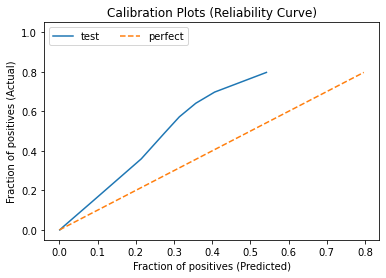

In [101]:
from sklearn.calibration import calibration_curve

fig,ax = plot.subplots(1)
plot_test_truth, plot_test_predictions = calibration_curve(target_test, test_probabilities,strategy='quantile', n_bins=10)
plot.plot(plot_test_predictions, plot_test_truth,label='test')
# Useless to draw train curve : almost identical to test and therefore, invisible
#plot_train_truth, plot_train_predictions = calibration_curve(target_train, train_probabilities,strategy='quantile', n_bins=10)
#plot.plot(plot_train_predictions, plot_train_truth,label='train')

xmin = min(plot_predictions.min(), plot_truth.min())
xmax = max(plot_predictions.max(), plot_truth.max())
plot.plot([xmin,xmax],[xmin,xmax], '--',label='perfect')
#plot.plot([0, 1], [0, 1], '--', label='perfect')
ax.set_xlabel('Fraction of positives (Predicted)')
ax.set_ylabel('Fraction of positives (Actual)')
ax.set_ylim([-0.05, 1.05])
ax.legend(loc='upper left', ncol=2)
ax.set_title('Calibration Plots (Reliability Curve)')
plot.show()


That's it : blue line is largely above the truth, meaning probabilities are very underestimated: model is under-casting

Kaggle score is not impacted (we don't have the truth so we cannot recalibrate) as well as the model's logloss but all metrics from confusion matrix are false...

We have to recalibrate!! 
* Platt scaling : builds a logistic regression model where only input is uncalibrated probabilities and output true target
* Isotonic regression : make a piecewise calibration


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator

class MyPlattScaling(BaseEstimator):
    def __init__(self, log_odds: bool=True):
        self.log_odds = log_odds
    
    def fit(self, y_prob: numpy.ndarray, y_true: numpy.ndarray):
        self.fit_predict(y_prob, y_true)
        return self

    @staticmethod
    def _convert_to_log_odds(y_prob: numpy.ndarray):
        eps = 1e-12
        y_prob = numpy.clip(y_prob, eps, 1 - eps)
        y_prob = numpy.log(y_prob / (1 - y_prob))
        return y_prob

    def predict(self, y_prob: numpy.ndarray):
        if self.log_odds:
            y_prob = self._convert_to_log_odds(y_prob)

        output = self._transform(y_prob)
        return output

    def _transform(self, y_prob: numpy.ndarray):
        output = y_prob * self.coef_[0] + self.intercept_
        output = 1 / (1 + numpy.exp(-output))
        return output

    def fit_predict(self, y_prob: numpy.ndarray, y_true: numpy.ndarray) -> numpy.ndarray:
        if self.log_odds:
            y_prob = self._convert_to_log_odds(y_prob)

        # the class expects 2d ndarray as input features
        logistic = LogisticRegression(C=1e10, solver='lbfgs')
        logistic.fit(y_prob.reshape(-1, 1), y_true)
        self.coef_ = logistic.coef_[0]
        self.intercept_ = logistic.intercept_

        y_calibrated_prob = self._transform(y_prob)
        return y_calibrated_prob

Apply this calibration

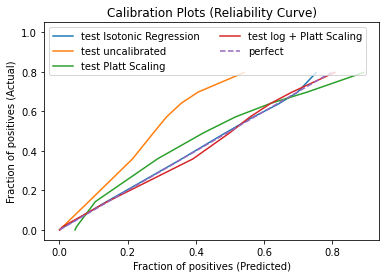

In [142]:
from sklearn.calibration import IsotonicRegression

isotonic = IsotonicRegression(out_of_bounds='clip',
                              y_min=train_probabilities.min(),
                              y_max=train_probabilities.max())
# still valid: learn on train, predict on test
isotonic.fit(train_probabilities,target_train)
isotonic_test_probabilities = isotonic.predict(test_probabilities)

platt = MyPlattScaling(log_odds=False)
# still valid: learn on train, predict on test
platt.fit(train_probabilities,target_train)
platt_test_probabilities = platt.predict(test_probabilities)

new_test_predictions = numpy.where(platt_test_probabilities>0.5,1,0)
print_info('Now, we have %.3f %% of 1 using Platt"s scaling recalibrated probabilities' % new_test_predictions.mean())

fig,ax = plot.subplots(1)
plot_test_truth, plot_test_predictions = calibration_curve(target_test, isotonic_test_probabilities,strategy='quantile', n_bins=10)
plot.plot(plot_test_predictions, plot_test_truth,label='test Isotonic Regression')

plot_test_truth, plot_test_predictions = calibration_curve(target_test, test_probabilities,strategy='quantile', n_bins=10)
plot.plot(plot_test_predictions, plot_test_truth,label='test uncalibrated')

plot_test_truth, plot_test_predictions = calibration_curve(target_test, platt_test_probabilities,strategy='quantile', n_bins=10)
plot.plot(plot_test_predictions, plot_test_truth,label='test Platt Scaling')

platt = PlattScaling(log_odds=True)
# still valid: learn on train, predict on test
platt.fit(train_probabilities,target_train)
platt_log_test_probabilities = platt.predict(test_probabilities)
plot_test_truth, plot_log_test_predictions = calibration_curve(target_test, platt_log_test_probabilities,strategy='quantile', n_bins=10)
plot.plot(plot_log_test_predictions, plot_test_truth,label='test log + Platt Scaling')

new_test_log_predictions = numpy.where(platt_log_test_probabilities>0.5,1,0)
print_warning('Now, we have %.3f %% of 1 using log+Platt"s scaling recalibrated probabilities' % new_test_log_predictions.mean())

new_test_isotonic_predictions = numpy.where(isotonic_test_probabilities>0.5,1,0)
print_warning('Now, we have %.3f %% of 1 using Isotonic"s recalibrated probabilities' % new_test_isotonic_predictions.mean())


xmin = min(plot_predictions.min(), plot_truth.min())
xmax = max(plot_predictions.max(), plot_truth.max())
plot.plot([xmin,xmax],[xmin,xmax], '--',label='perfect')
ax.set_xlabel('Fraction of positives (Predicted)')
ax.set_ylabel('Fraction of positives (Actual)')
ax.set_ylim([-0.05, 1.05])
ax.legend(loc='upper left', ncol=2)
ax.set_title('Calibration Plots (Reliability Curve)')
plot.show()
